In [29]:
%pylab inline
import pandas as pd
import seaborn as sb
import numpy as np

In [3]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [4]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Data Preparation
---

In [5]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)

In [6]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

def get_weekday(dt):
    return dt.weekday()
data['Weekday'] = data['Date/Time'].map(get_weekday)

def get_hr(dt):
    return dt.hour
data['Hour'] = data['Date/Time'].map(get_hr)

In [8]:
data

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23


# Analysis:
---

## Analysis by date of the month:

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2104')

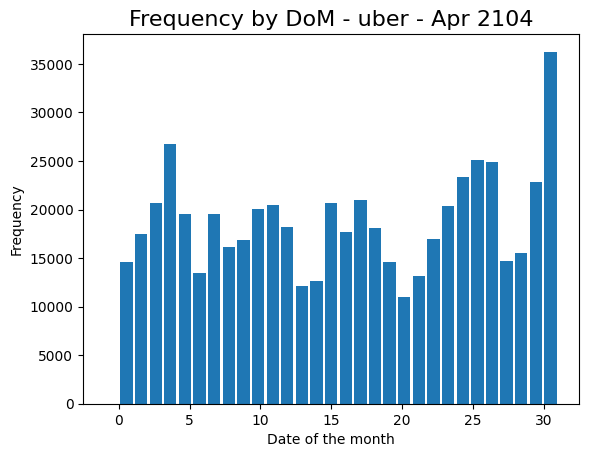

In [11]:
hist(data.dom, bins=31, rwidth=0.84, range=(-1,31))
xlabel("Date of the month", size= '10')
ylabel("Frequency", size='10')
title("Frequency by DoM - uber - Apr 2104", size='16')

In [12]:
def count_rows(rows):
    return len(rows)
by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

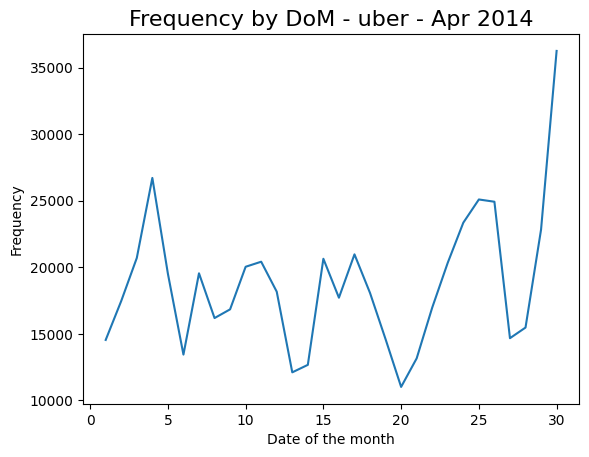

In [36]:
plot(by_date)
xlabel("Date of the month", size= '10')
ylabel("Frequency", size='10')
title("Frequency by DoM - uber - Apr 2014", size='16')

### We see a trend that most rides are being taken on the 3rd day of the week and the 30th day of the week

## Analysis by the hour of the day

In [18]:
arr = np.arange(24)

Text(0.5, 1.0, 'Analysis of frequency by Hour - uber - Apr 2014')

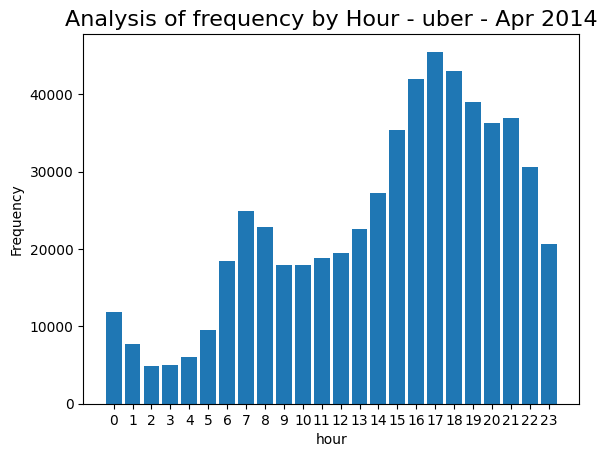

In [40]:
hist(data.Hour, bins=24, rwidth=0.84, range=(-0.5,23.5))
xticks(range(24), arr)
ylabel("Frequency", size= '10')
xlabel("hour", size = '10')
title("Analysis of frequency by Hour - uber - Apr 2014", size = '16')

### This graph suggests that most rides are being taken in the evening time, between 1600 hrs and 2100 hrs

## Analysis by the day of the week

Text(0.5, 1.0, 'Analysis of frequency by day of the week - uber - Apr 2014')

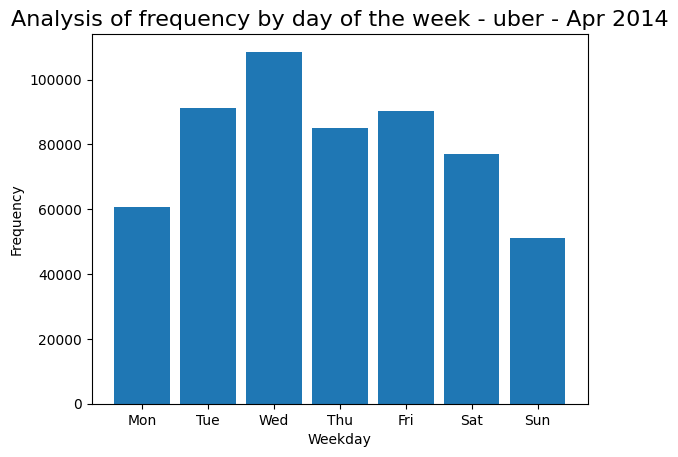

In [46]:
hist(data.Weekday, bins=7, range=(-0.5,6.5), rwidth=0.84)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
xlabel('Weekday')
ylabel('Frequency')
title('Analysis of frequency by day of the week - uber - Apr 2014', size='16')

#### This graph shows most rides are taken on Wednesday, followed by Tuesday and then Saturday


## Cross Analysis (hour, weekday)

In [50]:
data.groupby('Hour Weekday'.split()).apply(count_rows)

Hour  Weekday
0     0           518
      1           765
      2           899
      3           792
      4          1367
                 ... 
23    2          2571
      3          2909
      4          5393
      5          5719
      6          1018
Length: 168, dtype: int64

In [51]:
by_cross = data.groupby('Hour Weekday'.split()).apply(count_rows).unstack()

Text(0.5, 1.0, 'Hour/Weekday cross analysis using Heatmap')

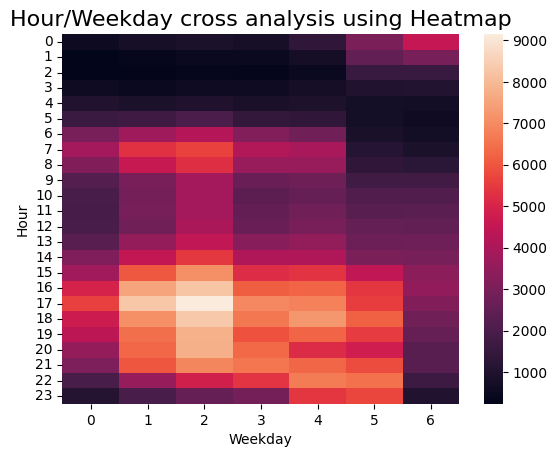

In [52]:
sb.heatmap(by_cross)
title("Hour/Weekday cross analysis using Heatmap", size = '16')

#### We can easily notice at what day and at what time do we see the most uber rides taken
#### Here it seems to be Wednesday evening 5:00 PM, with a ride freqeuncy of about 9000

## Analysis by lattitude and longitude

Text(0.5, 1.0, 'Analysis of frequency by Lattitude - uber - Apr 2014')

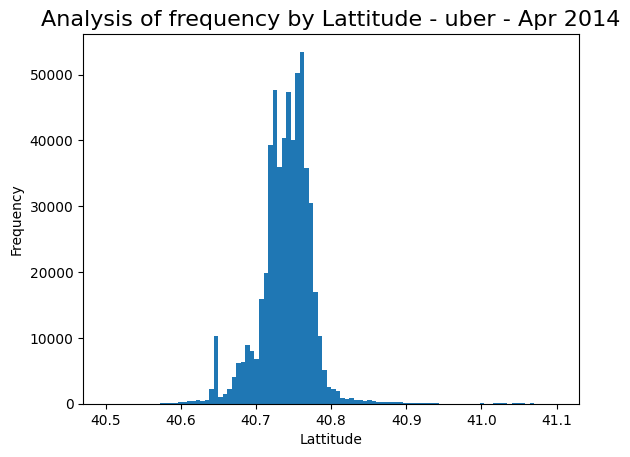

In [54]:
hist(data['Lat'], bins = 100, range= (40.5, 41.1))
xlabel('Lattitude', size='10')
ylabel('Frequency', size='10')
title("Analysis of frequency by Lattitude - uber - Apr 2014", size='16')

Text(0.5, 1.0, 'Analysis of frequency by Longitude - uber - Apr 2014')

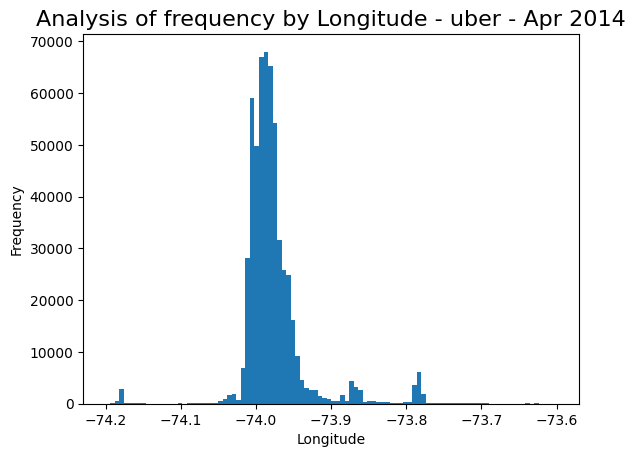

In [55]:
hist(data['Lon'],bins = 100, range= (-74.2, -73.6))
xlabel('Longitude', size='10')
ylabel('Frequency', size='10')
title("Analysis of frequency by Longitude - uber - Apr 2014", size='16')

#### Now plotting the both on the same histotgram

Text(0.5, 1.0, 'Lat/Lon cross analysis')

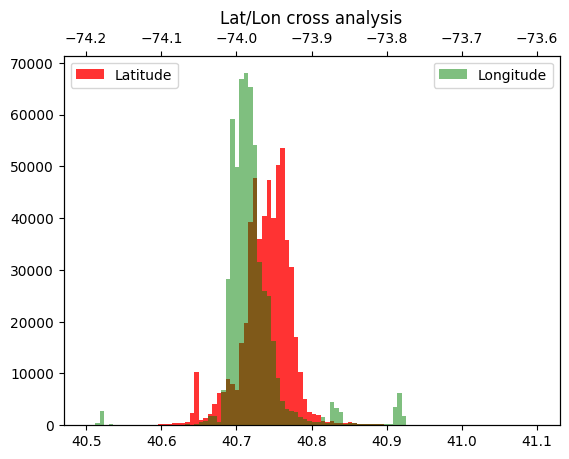

In [34]:
hist(data['Lat'], bins = 100, range= (40.5, 41.1), color='r', alpha= 0.8, label='Latitude')
legend(loc='upper left')
twiny() # needed to cobine both the plots
hist(data['Lon'], bins = 100, range= (-74.2, -73.6), alpha= 0.5, color='g', label='Longitude')
legend(loc='best')
title("Lat/Lon cross analysis")

#### The lower x axis shows 'Lattitude' and the upper the axis shows 'Longitude'

#### This graph depicts the corss analysis of Lattitude and Longitude to the frequency of rides booked. A better version of this graph is shown at the end

(40.5, 41.1)

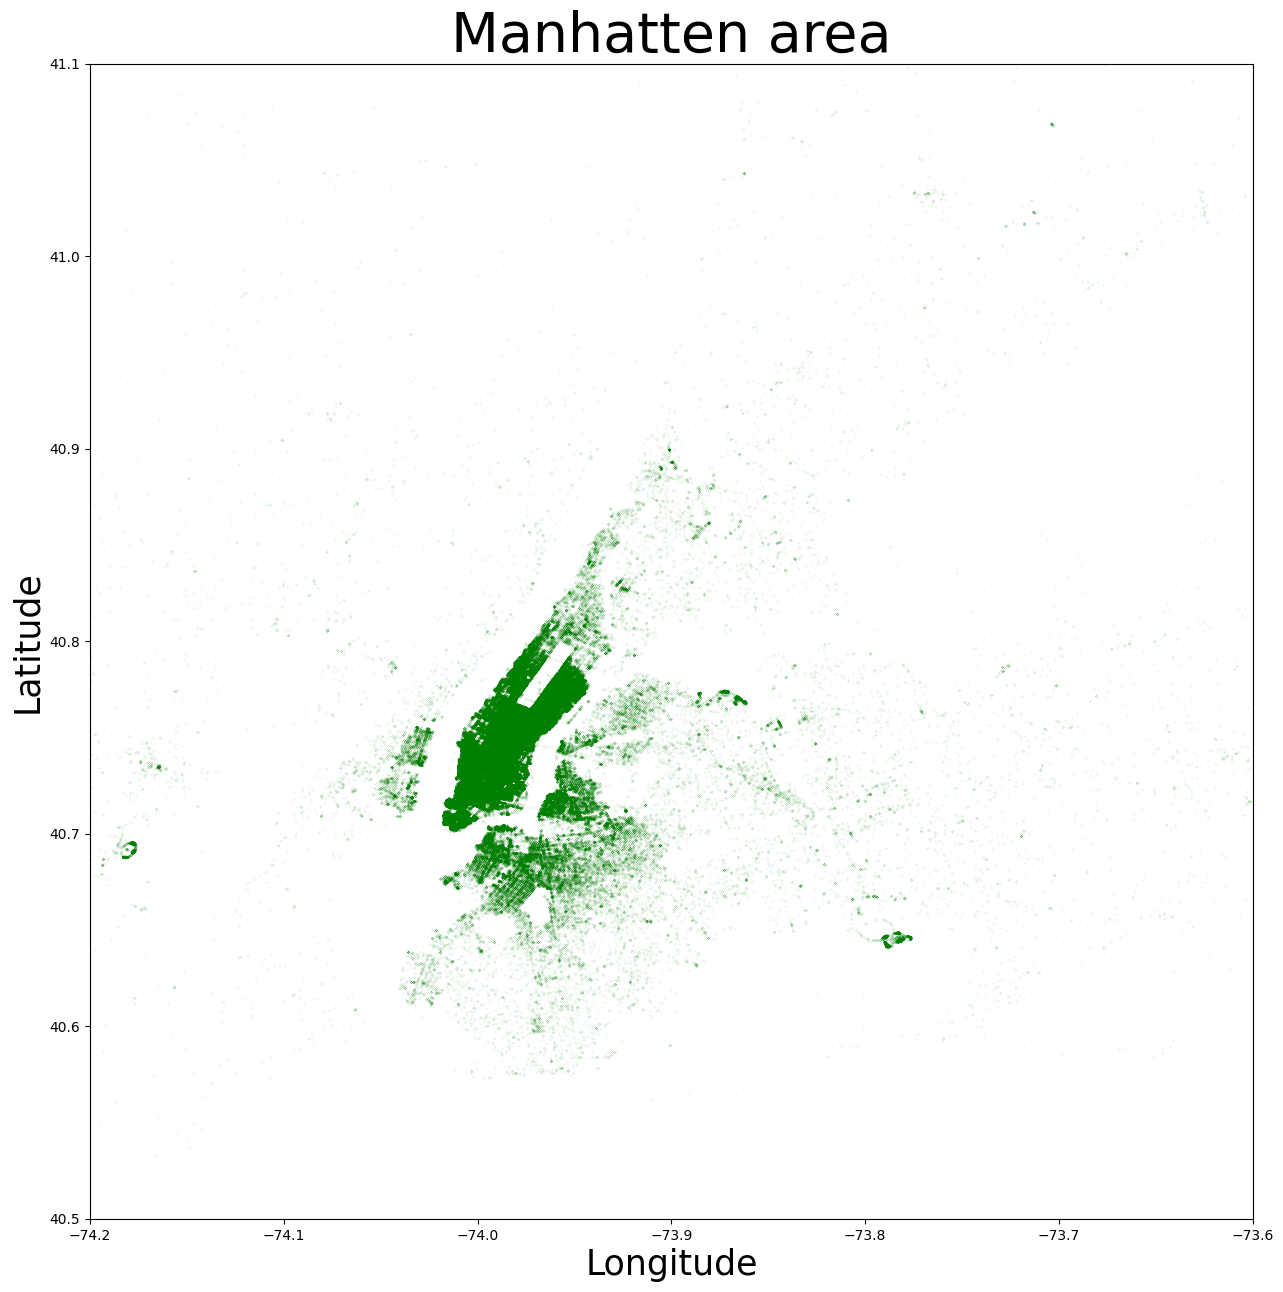

In [35]:
figure(figsize=(15, 15))
plot(data['Lon'], data['Lat'],'.', ms=.1, color='g')
xlabel('Longitude', size =25)
ylabel('Latitude', size =25)
title("Manhatten area", size =40)
xlim(-74.2, -73.6)
ylim(40.5, 41.1)

#### This plot depicts the cross analysis of Lattitude/Logitude is a map like manner.
#### The Manhatten area is been shown here which is where our data set is majorly from

### We clearly see that the most rides are taken form the Lower Manhattan Area, between Wall street and the Central Park